In [23]:
import math
import random
import matplotlib.pyplot as plt


def bike_distance_dist(weight_per_km, min_km, max_km):
    return {"weight": weight_per_km * (max_km - min_km), 
            "min": min_km,
            "max": max_km,
            "applies?": lambda x : min_km <= x < max_km 
           }

ratios = {"500m-1km":   bike_distance_dist(7, .5, 1),
          "1km-2km":    bike_distance_dist(10, 1, 2),
          "2km-3km":    bike_distance_dist(50, 2, 3),
          "3km-5km":    bike_distance_dist(50, 3, 5),
          "5km-10km":   bike_distance_dist(30, 5, 10),
          "10km-40km":  bike_distance_dist(4, 10, 40),
          "40km-200km": bike_distance_dist(1, 40, 200)}

weight_sum = sum(val["weight"] for val in ratios.values())
for ratio in ratios.values():
    ratio["percentage"] = ratio["weight"] / weight_sum

## Generate histogram to represent probability distribution

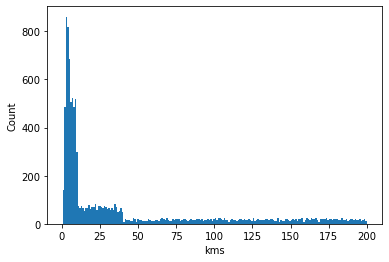

In [24]:
hist_data = []
total_count = 10000

for ratio in ratios:
    num_in_range = math.floor(ratios[ratio]["percentage"] * total_count)
    for _ in range(num_in_range):
        hist_data.append(random.uniform(ratios[ratio]["min"], ratios[ratio]["max"]))

plt.hist(hist_data, bins=200) 
plt.ylabel('Count')
plt.xlabel('kms');
        


In [43]:
def bin_by_kms(kms):
    return next((k for k, v in ratios.items() if v["applies?"](kms)), None)

In [44]:
bin_by_kms(3.1)

'3km-5km'